<a href="https://colab.research.google.com/github/PolyGon-13/DataScience_Study/blob/main/_projects/Pima_People_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics,tree,preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import font_manager,rc

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [81]:
df=pd.read_csv('./data/diabetes.csv')
df.shape

(768, 9)

In [89]:
df.columns=['pregnancies','glucose','blood_pressure','skin_thickness','insulin','bmi','diabetes_pedigree_function','age','outcome']

In [90]:
df.sample(5)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
27,1,97,66,15,140,23.2,0.487,22,0
588,3,176,86,27,156,33.3,1.154,52,1
325,1,157,72,21,168,25.6,0.123,24,0
75,1,0,48,20,0,24.7,0.140,22,0
337,5,115,76,0,0,31.2,0.343,44,1


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   skin_thickness              768 non-null    int64  
 4   insulin                     768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [92]:
df.isnull().sum()

,0
pregnancies,0
glucose,0
blood_pressure,0
skin_thickness,0
insulin,0
bmi,0
diabetes_pedigree_function,0
age,0
outcome,0


In [93]:
df.duplicated().sum()

0

In [94]:
corr=df.corr()
corr

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


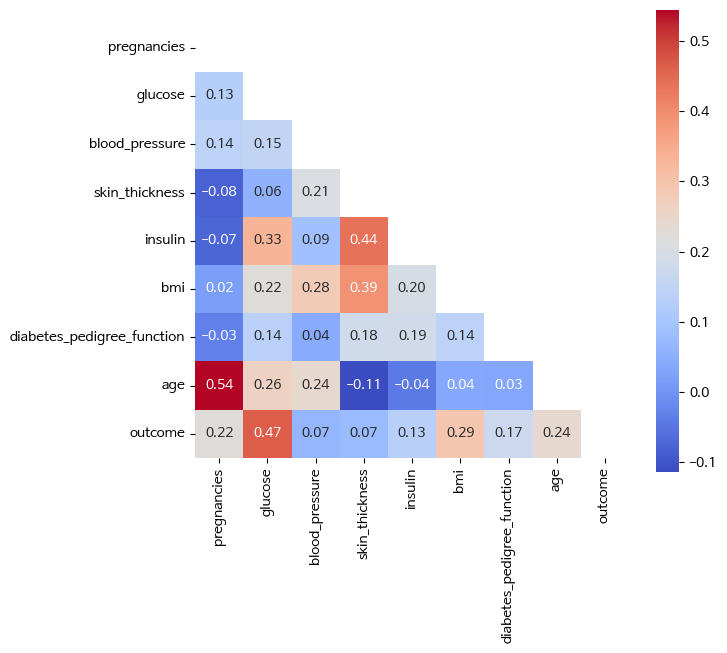

In [95]:
mask=np.triu(np.ones_like(corr,dtype=bool))

plt.figure(figsize=(7,6))
sns.heatmap(corr,mask=mask,cmap='coolwarm',
            annot=True,fmt='.2f',cbar=True,square=True)
plt.show()

In [96]:
df['outcome'].value_counts(normalize=True)

,proportion
outcome,
0,0.651042
1,0.348958


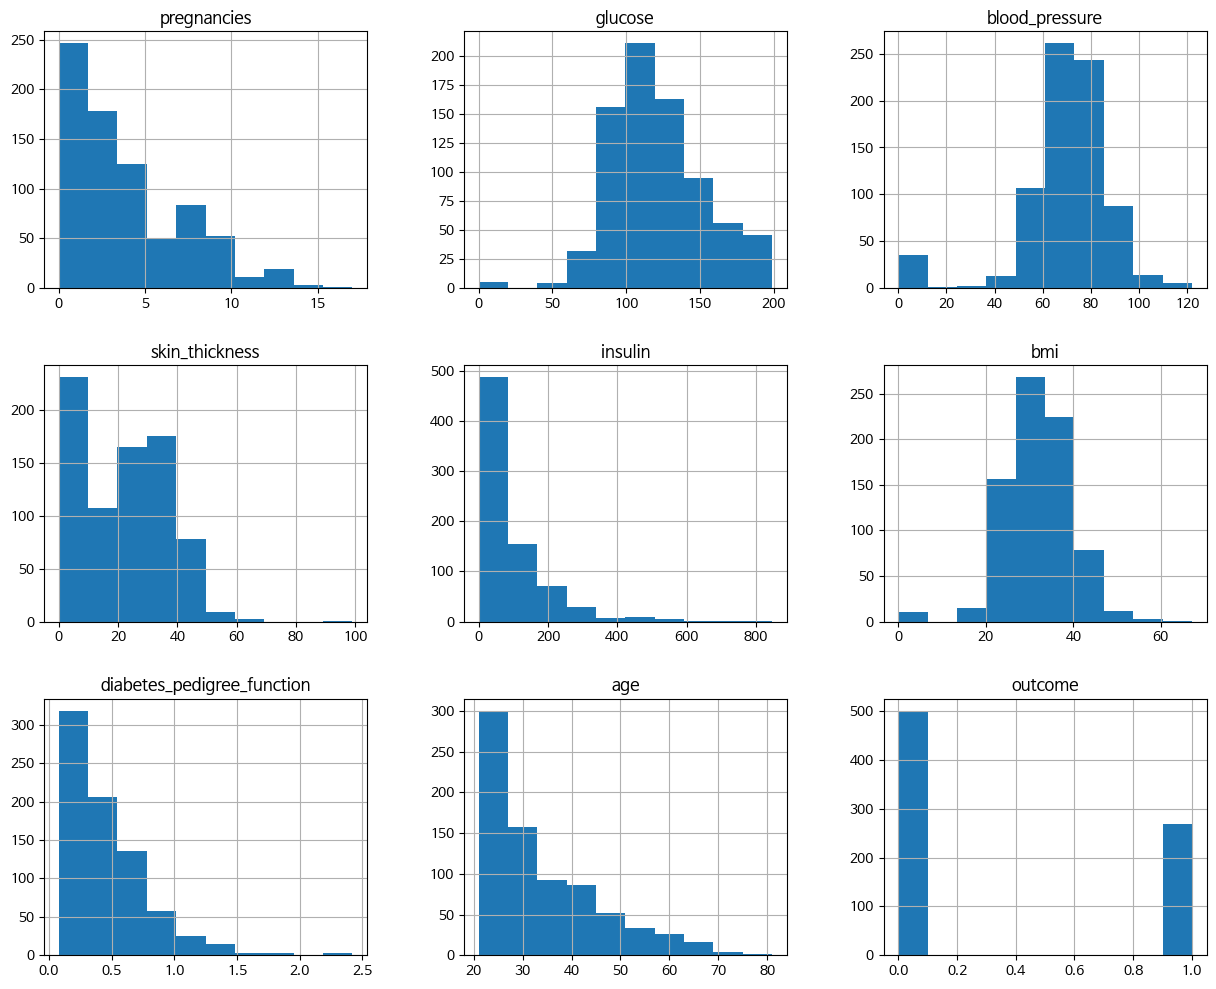

In [97]:
df.hist(figsize=(15,12));

# Test1

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

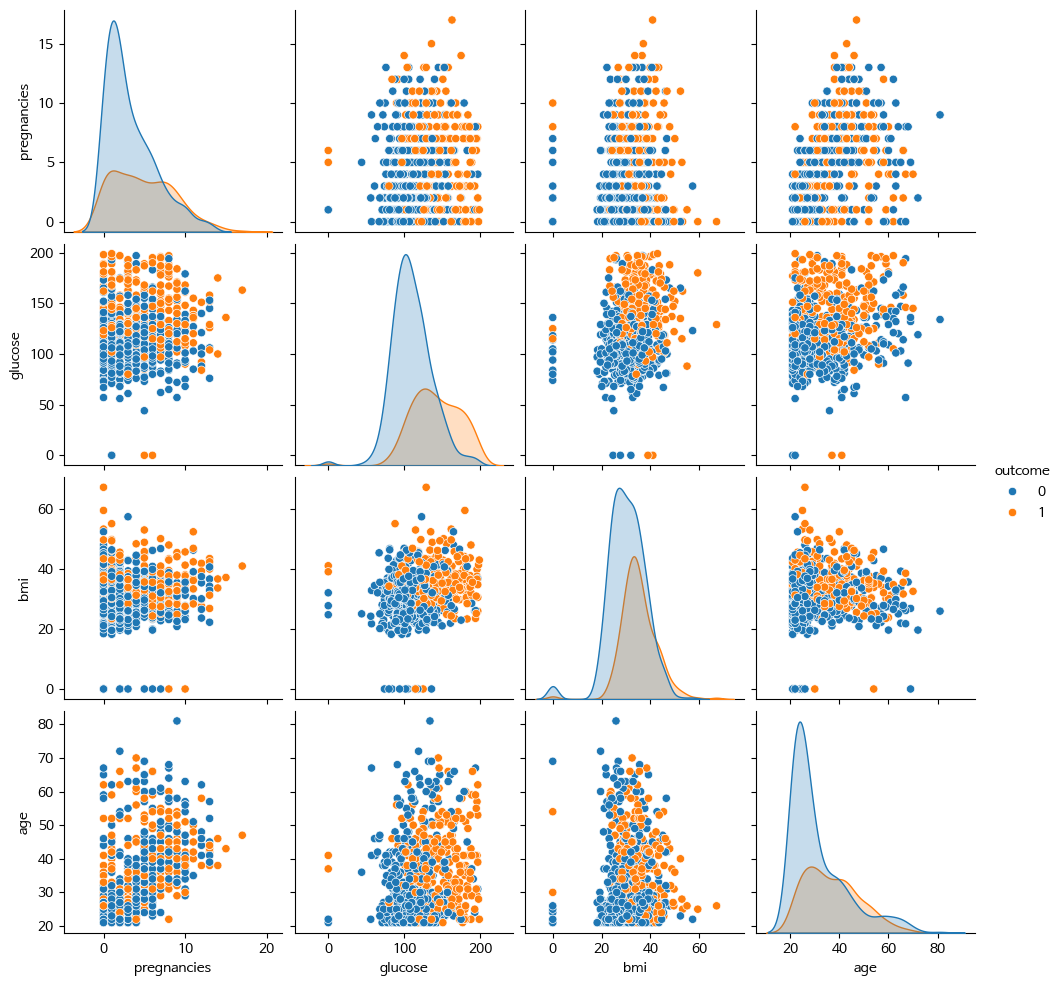

In [99]:
vis_cols=['pregnancies','glucose','bmi','age','outcome']
sns.pairplot(data=df[vis_cols],hue='outcome');

In [102]:
train_features=['pregnancies','glucose','bmi','age']

X=df[train_features]
y=df['outcome']

X=preprocessing.StandardScaler().fit(X).transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                test_size=0.3,
                                                random_state=10)
print('train data 개수 : ',X_train.shape)
print('test data 개수 : ',X_test.shape)

train data 개수 :  (537, 4)
test data 개수 :  (231, 4)


In [111]:
tree_model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)

tree_model.fit(X_train,y_train)
y_hat=tree_model.predict(X_test)

print(y_hat[:10])
print(y_test.values[:10])

[1 0 0 0 1 0 0 1 0 1]
[0 0 0 1 0 0 0 1 0 0]


In [112]:
tree_matrix=metrics.confusion_matrix(y_test,y_hat)
print(tree_matrix)

[[118  26]
 [ 27  60]]


In [113]:
tree_report=metrics.classification_report(y_test,y_hat)
print(tree_report)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       144
           1       0.70      0.69      0.69        87

    accuracy                           0.77       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.77      0.77      0.77       231



In [114]:
features=pd.DataFrame(tree_model.feature_importances_,
                      index=train_features,
                      columns=['Importance'])
features=features.sort_values(by='Importance',ascending=False)
features

,Importance
glucose,0.487203
bmi,0.295298
age,0.168121
pregnancies,0.049379


# Test2

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

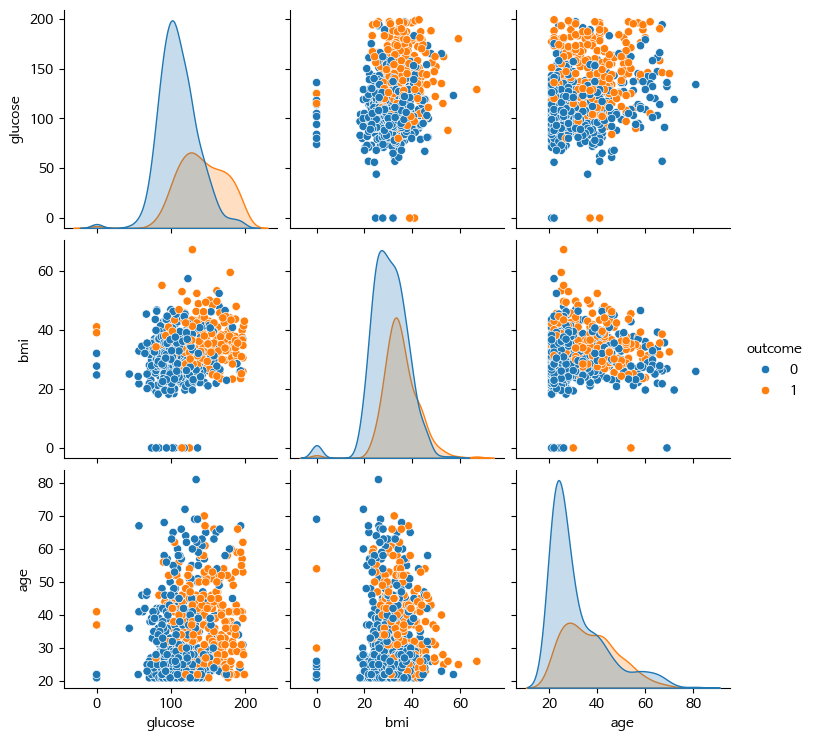

In [118]:
vis_cols2=['glucose','bmi','age','outcome']
sns.pairplot(data=df[vis_cols2],hue='outcome');

In [119]:
train_features2=['glucose','bmi','age']

X=df[train_features2]
y=df['outcome']

X=preprocessing.StandardScaler().fit(X).transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                test_size=0.3,
                                                random_state=10)
print('train data 개수 : ',X_train.shape)
print('test data 개수 : ',X_test.shape)

train data 개수 :  (537, 3)
test data 개수 :  (231, 3)


In [120]:
tree_model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)

tree_model.fit(X_train,y_train)
y_hat=tree_model.predict(X_test)

print(y_hat[:10])
print(y_test.values[:10])

[1 0 0 0 1 0 0 1 0 1]
[0 0 0 1 0 0 0 1 0 0]


In [121]:
tree_matrix=metrics.confusion_matrix(y_test,y_hat)
print(tree_matrix)

[[117  27]
 [ 28  59]]


In [122]:
tree_report=metrics.classification_report(y_test,y_hat)
print(tree_report)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       144
           1       0.69      0.68      0.68        87

    accuracy                           0.76       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.76      0.76      0.76       231



In [123]:
features=pd.DataFrame(tree_model.feature_importances_,
                      index=train_features,
                      columns=['Importance'])
features=features.sort_values(by='Importance',ascending=False)
features

,Importance
glucose,0.504015
bmi,0.306307
age,0.189677
